In [537]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import*
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import*
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,f1_score,precision_score,recall_score,classification_report
from sklearn.metrics import*
from sklearn.ensemble import*
from xgboost import*
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.stats.multicomp as mc

In [538]:
plt.rcParams['figure.figsize']=[25,10]

# Read the dataset

In [539]:
data = pd.read_csv('new_insurance_data.csv')
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [540]:
df = data.copy()
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


# Basic Analysis of dataset

# Understanding the data

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [542]:
df.shape

(1338, 13)

###### Observation

1. The data set has 1338 rows and 13 columns(including target variable)
2. The column ' insurance premium charges' is the target variable
3. There are 10 columns with continuous values, 3 columns with categorical in nature which should be encoded in furthur analysis.

In [543]:
df.size

17394

## Check For duplicates

In [544]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges


* There is no duplicates records found in this data

## Check for anomalies

In [545]:
col = df.columns.to_list()
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [546]:
for i in col:
    print(i)
    print(df[i].unique())
    print('********')

age
[18. 19. nan 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 31. 30. 33. 32. 34.
 36. 37. 35. 38. 40. 39. 41. 42. 43. 44. 46. 45. 48. 47. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]
********
sex
['male' 'female']
********
bmi
[23.21  30.14  33.33  33.66  34.1   34.43  37.29  41.14  43.01  53.13
 19.8   20.3   20.7   27.6   28.7      nan 34.4   35.4   31.1   35.53
 36.85  20.79  26.73  17.48  31.13  31.35  20.425 21.755 22.61  38.17
 38.28  25.175 25.555 39.16  39.82  40.26  27.835 30.59  26.84  33.77
 39.5   15.96  21.47  22.99  23.085 23.75  25.46  26.125 23.32  28.5
 29.37  30.03  35.2   17.8   18.6   20.6   24.7   28.9   29.8   32.9
 40.5   29.735 26.51  32.56  20.9   24.6   41.91  28.4   29.6   31.46
 33.    33.3   28.975 31.255 36.86  22.    27.93  23.4   25.8   29.3
 32.01  40.47  35.86  34.6   34.87  39.49  32.11  26.03  22.3   27.36
 22.515 30.495 35.15  36.575 25.74  37.43  24.3   27.1   28.05  28.82
 36.    25.08  26.315 28.215 24.09  30.115 30.305 31.92  33

### Check the data types of the columns and change if any columns are wrongly identified

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

* All the features in the dataset are in proper data types 

### Separating numerical columns and categorical columns

In [548]:
num = df.select_dtypes(include = np.number).columns.to_list()
num

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'charges']

In [549]:
cat = df.select_dtypes(exclude = np.number).columns.to_list()
cat

['sex', 'smoker', 'region']

## STATS Analysis

##### Measures of Central Tendency

In [550]:
for i in num:
    print(f'The Mean value of column {i} is',df[i].mean())

The Mean value of column age is 39.31000752445448
The Mean value of column bmi is 30.665112359550562
The Mean value of column children is 1.0907726931732933
The Mean value of column Claim_Amount is 33361.327180102715
The Mean value of column past_consultations is 15.216216216216216
The Mean value of column num_of_steps is 910004.6958801498
The Mean value of column Hospital_expenditure is 15841791.94403091
The Mean value of column NUmber_of_past_hospitalizations is 1.06062874251497
The Mean value of column Anual_Salary is 369684859.7033724
The Mean value of column charges is 13270.422265141257


In [551]:
for i in num:
    print(f'The Median value of column {i} is',df[i].median())

The Median value of column age is 39.0
The Median value of column bmi is 30.4
The Median value of column children is 1.0
The Median value of column Claim_Amount is 33700.310675
The Median value of column past_consultations is 15.0
The Median value of column num_of_steps is 914300.0
The Median value of column Hospital_expenditure is 7490336.904999999
The Median value of column NUmber_of_past_hospitalizations is 1.0
The Median value of column Anual_Salary is 141936093.2
The Median value of column charges is 9382.033


In [552]:
for i in num:
    print(f'The Mode value of column {i} is',df[i].mode())

The Mode value of column age is 0    18.0
Name: age, dtype: float64
The Mode value of column bmi is 0    32.3
Name: bmi, dtype: float64
The Mode value of column children is 0    0.0
Name: children, dtype: float64
The Mode value of column Claim_Amount is 0        1920.136268
1        2912.590584
2        3037.725919
3        3370.398323
4        3768.603033
            ...     
1319    72147.094040
1320    72760.929790
1321    73894.367040
1322    76028.853480
1323    77277.988480
Name: Claim_Amount, Length: 1324, dtype: float64
The Mode value of column past_consultations is 0    20.0
Name: past_consultations, dtype: float64
The Mode value of column num_of_steps is 0        695430.0
1        699157.0
2        699159.0
3        700250.0
4        701227.0
          ...    
1330    1092005.0
1331    1095960.0
1332    1100328.0
1333    1106821.0
1334    1107872.0
Name: num_of_steps, Length: 1335, dtype: float64
The Mode value of column Hospital_expenditure is 0       2.945253e+04
1       3.

In [553]:
for i in cat:
    print(f'The Mode value of column {i} is','\n',df[i].mode())

The Mode value of column sex is 
 0    male
Name: sex, dtype: object
The Mode value of column smoker is 
 0    no
Name: smoker, dtype: object
The Mode value of column region is 
 0    southeast
Name: region, dtype: object


In [554]:
df['sex'].value_counts(normalize=True)*100

sex
male      50.523169
female    49.476831
Name: proportion, dtype: float64

In [555]:
df['smoker'].value_counts(normalize=True)*100

smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64

In [556]:
df['region'].value_counts(normalize=True)*100

region
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: proportion, dtype: float64

##### Measures of dispersion/deviation/Spread(for only numeric variables) 

In [557]:
for i in num:
    print(f'Range value of column {i} is',df[i].max() - df[i].min())

Range value of column age is 46.0
Range value of column bmi is 37.17
Range value of column children is 5.0
Range value of column Claim_Amount is 75357.852212
Range value of column past_consultations is 39.0
Range value of column num_of_steps is 412442.0
Range value of column Hospital_expenditure is 261602246.76704
Range value of column NUmber_of_past_hospitalizations is 3.0
Range value of column Anual_Salary is 4114449565.092
Range value of column charges is 62648.554110000005


In [558]:
for i in num:
    print(f'Variance value of column {i} is',df[i].var())

Variance value of column age is 196.9761121234373
Variance value of column bmi is 37.230617940889104
Variance value of column children is 1.444456834929453
Variance value of column Claim_Amount is 243899695.0006479
Variance value of column past_consultations is 55.766889353666215
Variance value of column num_of_steps is 8443058973.703544
Variance value of column Hospital_expenditure is 712518797522796.1
Variance value of column NUmber_of_past_hospitalizations is 0.2847109152481553
Variance value of column Anual_Salary is 3.2135780064181606e+17
Variance value of column charges is 146652372.15285498


In [559]:
for i in num:
    print(f'STDV value of column {i} is',df[i].std())

STDV value of column age is 14.034817851452056
STDV value of column bmi is 6.101689761114465
STDV value of column children is 1.201855579896958
STDV value of column Claim_Amount is 15617.288336988848
STDV value of column past_consultations is 7.467723170663613
STDV value of column num_of_steps is 91886.11959215354
STDV value of column Hospital_expenditure is 26693047.7376188
STDV value of column NUmber_of_past_hospitalizations is 0.5335830912314925
STDV value of column Anual_Salary is 566884292.1106706
STDV value of column charges is 12110.011236694001


In [560]:
for i in num:
    print(f'IQR value of column {i} is',df[i].quantile(0.75) -df[i].quantile(0.25))

IQR value of column age is 24.0
IQR value of column bmi is 8.384999999999998
IQR value of column children is 2.0
IQR value of column Claim_Amount is 24283.471567499997
IQR value of column past_consultations is 11.0
IQR value of column num_of_steps is 124484.5
IQR value of column Hospital_expenditure is 6763188.95775
IQR value of column NUmber_of_past_hospitalizations is 0.0
IQR value of column Anual_Salary is 247330544.58249998
IQR value of column charges is 11899.625365


##### Measures of shape of the distribution

In [561]:
for i in num:
    print(f'Skewness value of column {i} is',df[i].skew())

Skewness value of column age is 0.04551443505897466
Skewness value of column bmi is 0.28388582142032676
Skewness value of column children is 0.9320626246951852
Skewness value of column Claim_Amount is 0.0982078802375097
Skewness value of column past_consultations is 0.4140463235671068
Skewness value of column num_of_steps is -0.0816904798062698
Skewness value of column Hospital_expenditure is 3.7467801062030657
Skewness value of column NUmber_of_past_hospitalizations is 0.11638839300151764
Skewness value of column Anual_Salary is 2.614587690281893
Skewness value of column charges is 1.5158796580240386


* The column age,bmi,children,past_consultations,NUmber_of_past_hospitalizations,Claim_Amount,Anual_Salary,insurance premium charges are right skewed indicating the presence of outliers on the right side of the data
* The column num_of_steps  is very slightly left skewed indicating the very very less extreme values on the left side of the data

In [562]:
for i in num:
    print(f'Kurtosis value of column {i} is',df[i].kurt())

Kurtosis value of column age is -1.2419442409824248
Kurtosis value of column bmi is -0.0521105058337219
Kurtosis value of column children is 0.1777105378912962
Kurtosis value of column Claim_Amount is -0.7154643836851715
Kurtosis value of column past_consultations is -0.1925685544325635
Kurtosis value of column num_of_steps is -0.6237162186816163
Kurtosis value of column Hospital_expenditure is 18.86929244982511
Kurtosis value of column NUmber_of_past_hospitalizations is 0.6587277837088306
Kurtosis value of column Anual_Salary is 7.362435860537092
Kurtosis value of column charges is 1.6062986532967907


##### Correlation/Covariance

In [563]:
df[num].cov()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.969761e+02,9.648530e+00,7.026784e-01,2.715757e+04,1.773923e+01,6.645075e+05,5.146558e+07,2.702511e+00,1.308533e+09,5.007022e+04
bmi,9.648530e+00,3.723062e+01,5.829173e-02,8.949561e+03,5.974160e+00,7.636752e+04,4.194529e+07,4.470741e-01,8.381732e+08,1.469812e+04
children,7.026784e-01,5.829173e-02,1.444457e+00,7.806040e+02,4.928802e-01,1.808881e+04,8.088412e+05,1.192755e-01,2.734993e+07,1.030729e+03
Claim_Amount,2.715757e+04,8.949561e+03,7.806040e+02,2.438997e+08,3.190213e+04,5.753097e+08,1.554232e+11,3.181090e+03,3.603177e+12,8.282451e+07
past_consultations,1.773923e+01,5.974160e+00,4.928802e-01,3.190213e+04,5.576689e+01,3.853427e+05,1.084671e+08,1.999391e+00,2.512715e+09,5.688354e+04
num_of_steps,6.645075e+05,7.636752e+04,1.808881e+04,5.753097e+08,3.853427e+05,8.443059e+09,1.535858e+12,4.151326e+04,3.838433e+13,9.912839e+08
Hospital_expenditure,5.146558e+07,4.194529e+07,8.088412e+05,1.554232e+11,1.084671e+08,1.535858e+12,7.125188e+14,9.308812e+06,1.457344e+16,2.822758e+11
NUmber_of_past_hospitalizations,2.702511e+00,4.470741e-01,1.192755e-01,3.181090e+03,1.999391e+00,4.151326e+04,9.308812e+06,2.847109e-01,2.233328e+08,5.308016e+03
Anual_Salary,1.308533e+09,8.381732e+08,2.734993e+07,3.603177e+12,2.512715e+09,3.838433e+13,1.457344e+16,2.233328e+08,3.213578e+17,6.523368e+12
charges,5.007022e+04,1.469812e+04,1.030729e+03,8.282451e+07,5.688354e+04,9.912839e+08,2.822758e+11,5.308016e+03,6.523368e+12,1.466524e+08


In [564]:
df[num].corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.112849,0.041558,0.123430,0.169275,0.517930,0.136930,0.363041,0.164328,0.294390
bmi,0.112849,1.000000,0.007944,0.093893,0.131246,0.136368,0.257141,0.137575,0.241941,0.198794
children,0.041558,0.007944,1.000000,0.041778,0.054787,0.163522,0.025150,0.185607,0.040070,0.070747
Claim_Amount,0.123430,0.093893,0.041778,1.000000,0.273779,0.400672,0.374159,0.381152,0.409268,0.439161
past_consultations,0.169275,0.131246,0.054787,0.273779,1.000000,0.562344,0.544640,0.503798,0.596322,0.629836
num_of_steps,0.517930,0.136368,0.163522,0.400672,0.562344,1.000000,0.626659,0.850089,0.739426,0.890642
Hospital_expenditure,0.136930,0.257141,0.025150,0.374159,0.544640,0.626659,1.000000,0.657247,0.969695,0.874079
NUmber_of_past_hospitalizations,0.363041,0.137575,0.185607,0.381152,0.503798,0.850089,0.657247,1.000000,0.743466,0.823581
Anual_Salary,0.164328,0.241941,0.040070,0.409268,0.596322,0.739426,0.969695,0.743466,1.000000,0.954255
charges,0.294390,0.198794,0.070747,0.439161,0.629836,0.890642,0.874079,0.823581,0.954255,1.000000


#### Co-Efficient of variation (Percentage of variation OR Level of variation)

In [565]:
for i in num:
    print(f'Level of variation in percentage  of column {i} is',(df[i].std() / df[i].mean())*100)

Level of variation in percentage  of column age is 35.7029131645958
Level of variation in percentage  of column bmi is 19.897822938235905
Level of variation in percentage  of column children is 110.1838712519013
Level of variation in percentage  of column Claim_Amount is 46.81255110948726
Level of variation in percentage  of column past_consultations is 49.07739916777153
Level of variation in percentage  of column num_of_steps is 10.097323674058842
Level of variation in percentage  of column Hospital_expenditure is 168.49765374981192
Level of variation in percentage  of column NUmber_of_past_hospitalizations is 50.308187006723635
Level of variation in percentage  of column Anual_Salary is 153.3425773956572
Level of variation in percentage  of column charges is 91.25565859727446


## 5 Point Stats Summary

In [566]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1329.0,3.931001e+01,1.403482e+01,1.800000e+01,2.700000e+01,3.900000e+01,5.100000e+01,6.400000e+01
bmi,1335.0,3.066511e+01,6.101690e+00,1.596000e+01,2.630250e+01,3.040000e+01,3.468750e+01,5.313000e+01
children,1333.0,1.090773e+00,1.201856e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Claim_Amount,1324.0,3.336133e+04,1.561729e+04,1.920136e+03,2.076886e+04,3.370031e+04,4.505233e+04,7.727799e+04
past_consultations,1332.0,1.521622e+01,7.467723e+00,1.000000e+00,9.000000e+00,1.500000e+01,2.000000e+01,4.000000e+01
num_of_steps,1335.0,9.100047e+05,9.188612e+04,6.954300e+05,8.471995e+05,9.143000e+05,9.716840e+05,1.107872e+06
Hospital_expenditure,1334.0,1.584179e+07,2.669305e+07,2.945253e+04,4.077633e+06,7.490337e+06,1.084082e+07,2.616317e+08
NUmber_of_past_hospitalizations,1336.0,1.060629e+00,5.335831e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Anual_Salary,1332.0,3.696849e+08,5.668843e+08,2.747072e+06,7.701932e+07,1.419361e+08,3.243499e+08,4.117197e+09
charges,1338.0,1.327042e+04,1.211001e+04,1.121874e+03,4.740287e+03,9.382033e+03,1.663991e+04,6.377043e+04


In [567]:
df[cat].describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


## Check for Outliers

In [568]:
df[num].skew()

age                                0.045514
bmi                                0.283886
children                           0.932063
Claim_Amount                       0.098208
past_consultations                 0.414046
num_of_steps                      -0.081690
Hospital_expenditure               3.746780
NUmber_of_past_hospitalizations    0.116388
Anual_Salary                       2.614588
charges                            1.515880
dtype: float64

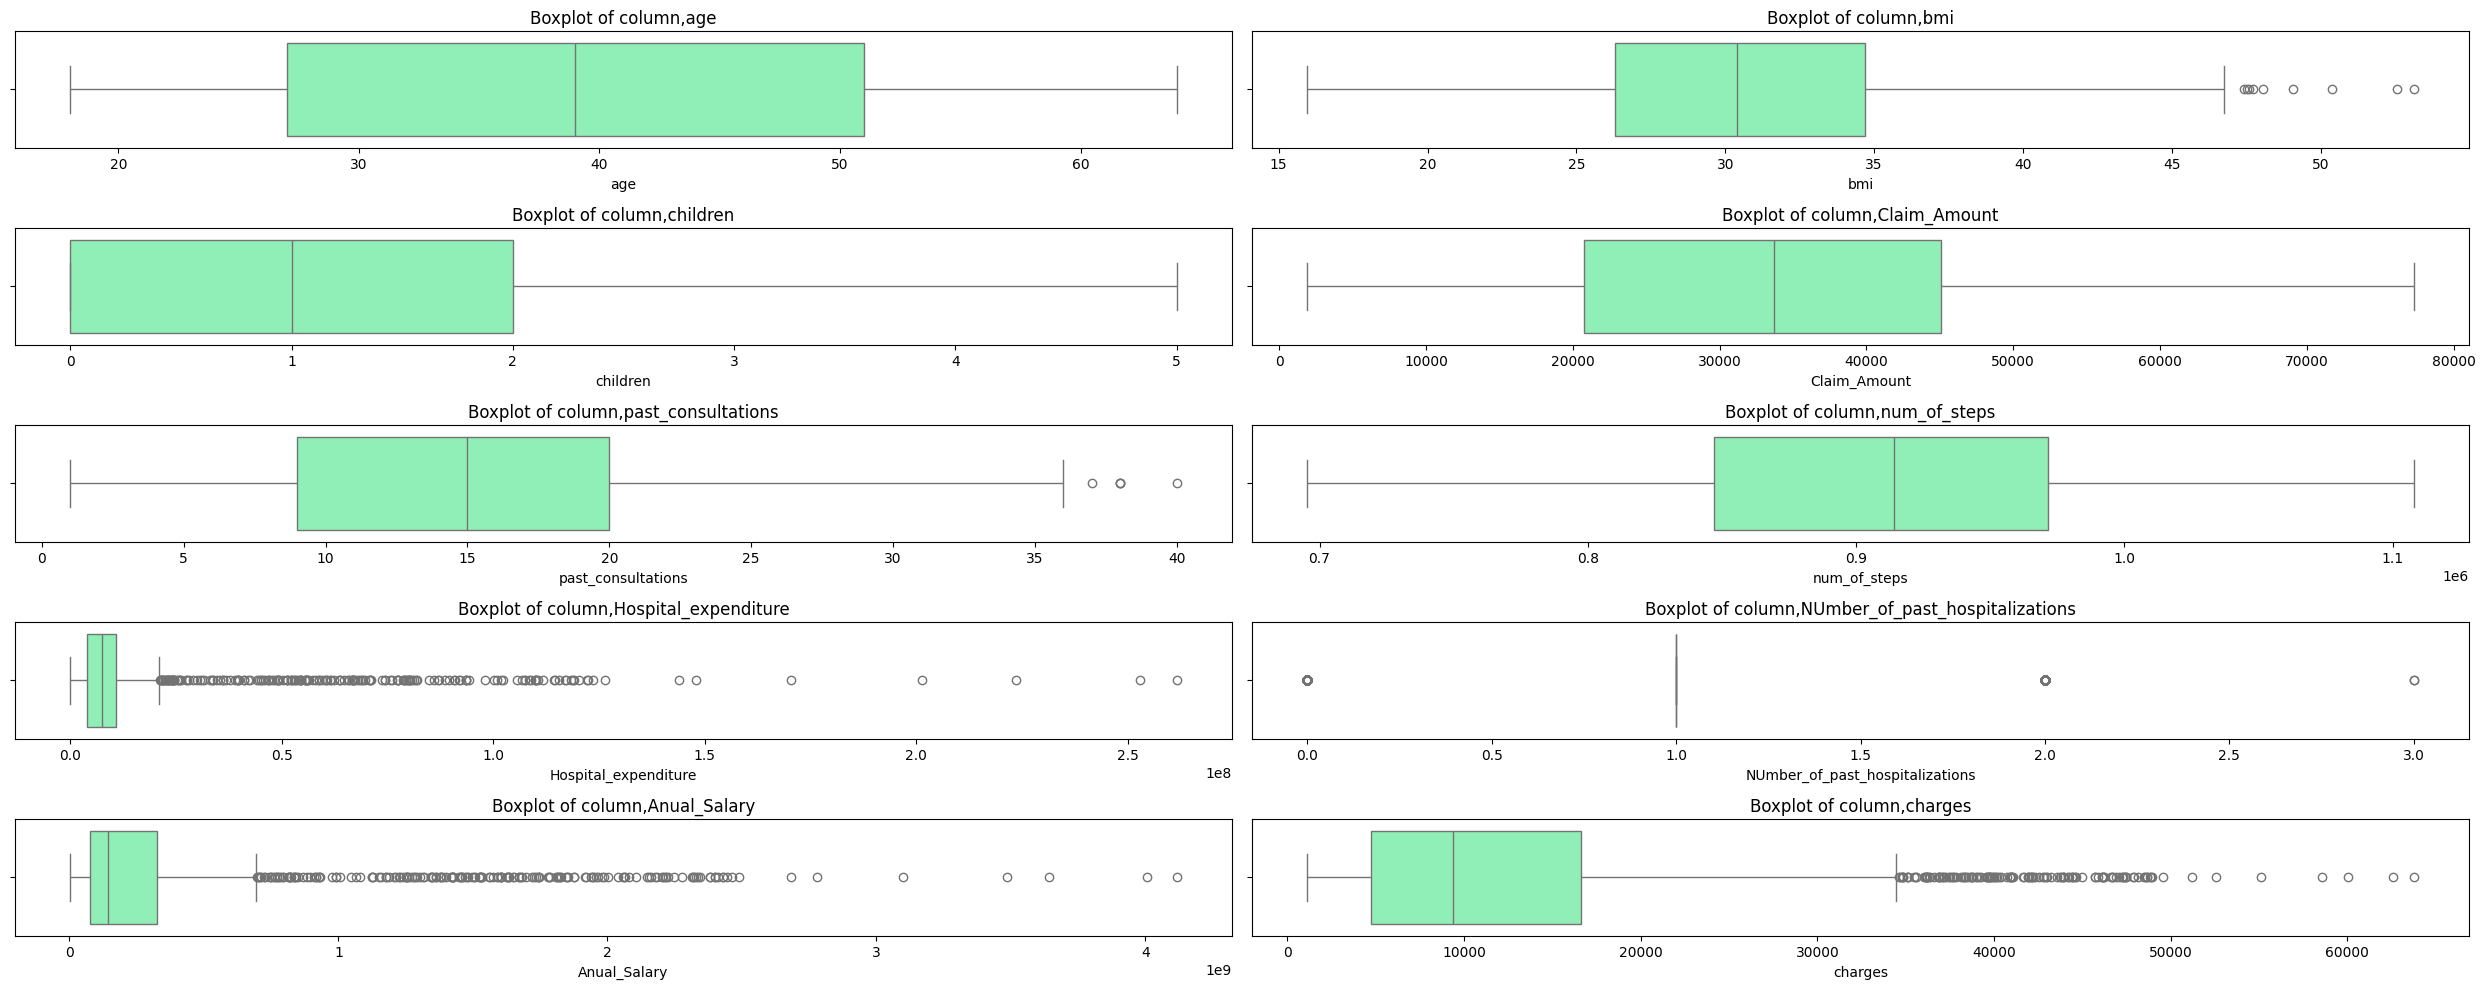

In [569]:
t=1
for i in num:
            plt.subplot(5,2,t)
            sns.boxplot(x=df[i],palette='rainbow')
            plt.title(f'Boxplot of column,{i}')
            t+=1
plt.tight_layout()
plt.show()

In [570]:
#using IQR method

q3 = df[num].quantile(0.75)
q1 = df[num].quantile(0.25)

In [571]:
iqr = q3-q1
iqr

age                                2.400000e+01
bmi                                8.385000e+00
children                           2.000000e+00
Claim_Amount                       2.428347e+04
past_consultations                 1.100000e+01
num_of_steps                       1.244845e+05
Hospital_expenditure               6.763189e+06
NUmber_of_past_hospitalizations    0.000000e+00
Anual_Salary                       2.473305e+08
charges                            1.189963e+04
dtype: float64

In [572]:
uw = q3 + 3.5*iqr
uw

age                                1.350000e+02
bmi                                6.403500e+01
children                           9.000000e+00
Claim_Amount                       1.300445e+05
past_consultations                 5.850000e+01
num_of_steps                       1.407380e+06
Hospital_expenditure               3.451198e+07
NUmber_of_past_hospitalizations    1.000000e+00
Anual_Salary                       1.190007e+09
charges                            5.828860e+04
dtype: float64

In [573]:
lw = q1 - 3.5*iqr
lw

age                               -5.700000e+01
bmi                               -3.045000e+00
children                          -7.000000e+00
Claim_Amount                      -6.422329e+04
past_consultations                -2.950000e+01
num_of_steps                       4.115038e+05
Hospital_expenditure              -1.959353e+07
NUmber_of_past_hospitalizations    1.000000e+00
Anual_Salary                      -7.886376e+08
charges                           -3.690840e+04
dtype: float64

In [574]:
df[((df[num] < lw) | (df[num] > uw)).any(axis=1)]

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


* The above data points are the outliers
* But there is need of these outliers because there are some columns which contains outliers are needed to analyse the given data set
* So i am proceeding with the data set without removing the outliers
* The columns containing outliers will be Transformed in future analysis
* If neccessary we can remove it under some of the specific conditions

# Missing Values Treatment

In [575]:
(df.isnull().sum()/len(df))*100

age                                0.672646
sex                                0.000000
bmi                                0.224215
children                           0.373692
smoker                             0.000000
Claim_Amount                       1.046338
past_consultations                 0.448430
num_of_steps                       0.224215
Hospital_expenditure               0.298954
NUmber_of_past_hospitalizations    0.149477
Anual_Salary                       0.448430
region                             0.000000
charges                            0.000000
dtype: float64

* There are some null values in the columns.

In [576]:
num

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'charges']

In [577]:
for i in num:
    if i != 'children':
        df[i].fillna(df[i].mean(),inplace=True)

In [578]:
df['children']=df['children'].fillna(df['children'].mode()[0])

In [579]:
for i in cat:
    df[i].fillna(df[i].mode(),inplace=True)

In [580]:
(df.isnull().sum()/len(df))*100

age                                0.0
sex                                0.0
bmi                                0.0
children                           0.0
smoker                             0.0
Claim_Amount                       0.0
past_consultations                 0.0
num_of_steps                       0.0
Hospital_expenditure               0.0
NUmber_of_past_hospitalizations    0.0
Anual_Salary                       0.0
region                             0.0
charges                            0.0
dtype: float64

## Feature Engineering

In [581]:
for i in df['bmi']:
    if i <= 18.5:
        df.loc[df['bmi'] == i, 'BMI_Category'] = 'Underweight'
    elif 18.5 < i <= 25:
        df.loc[df['bmi'] == i, 'BMI_Category'] = 'Healthy weight'
    elif 25 < i <= 30:
        df.loc[df['bmi'] == i, 'BMI_Category'] = 'Overweight'
    elif 30.0 < i < 40:
        df.loc[df['bmi'] == i, 'BMI_Category'] = 'Obesity'
    elif i >= 40:
        df.loc[df['bmi'] == i, 'BMI_Category'] = 'Severe Obesity'

In [582]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges,BMI_Category
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739,Healthy weight
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066,Obesity
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407,Obesity
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994,Obesity
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110,Obesity


# DATA VISULAIZATION

### Deep analysis:

In [583]:
plt.rcParams['figure.figsize']=[10,6]

### Univariate Analysis

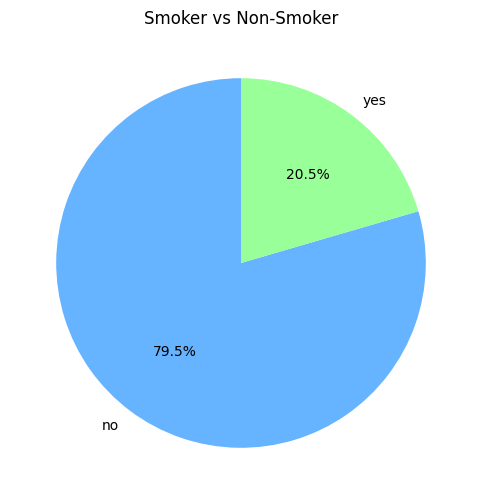

In [584]:
smoker_counts = df['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Smoker vs Non-Smoker')
plt.show()

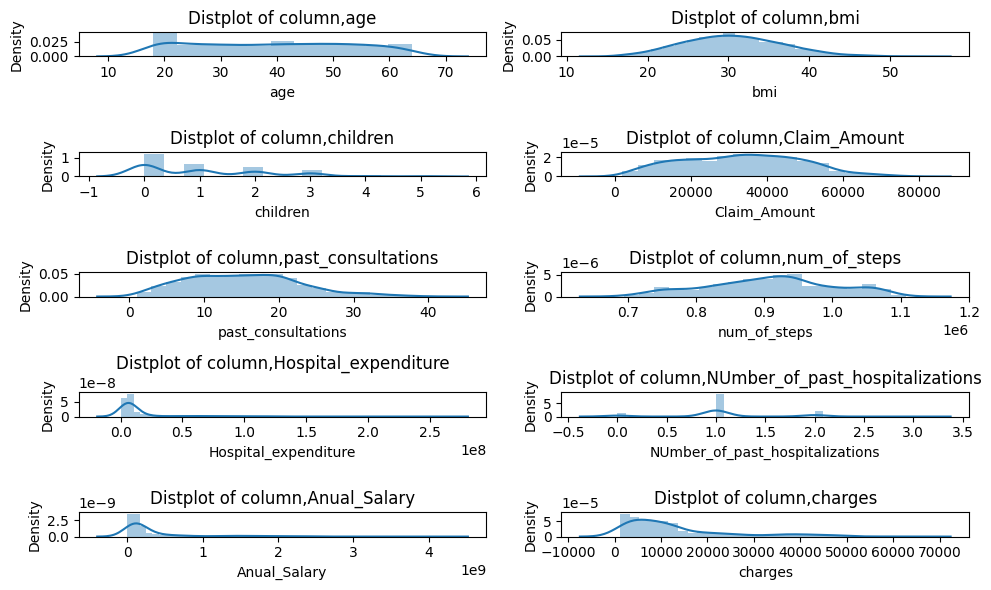

In [585]:
#numeric - distplot
t=1
for i in num:
            plt.subplot(5,2,t)
            sns.distplot(df[i])
            plt.title(f'Distplot of column,{i}')
            t+=1
plt.tight_layout()
plt.show()

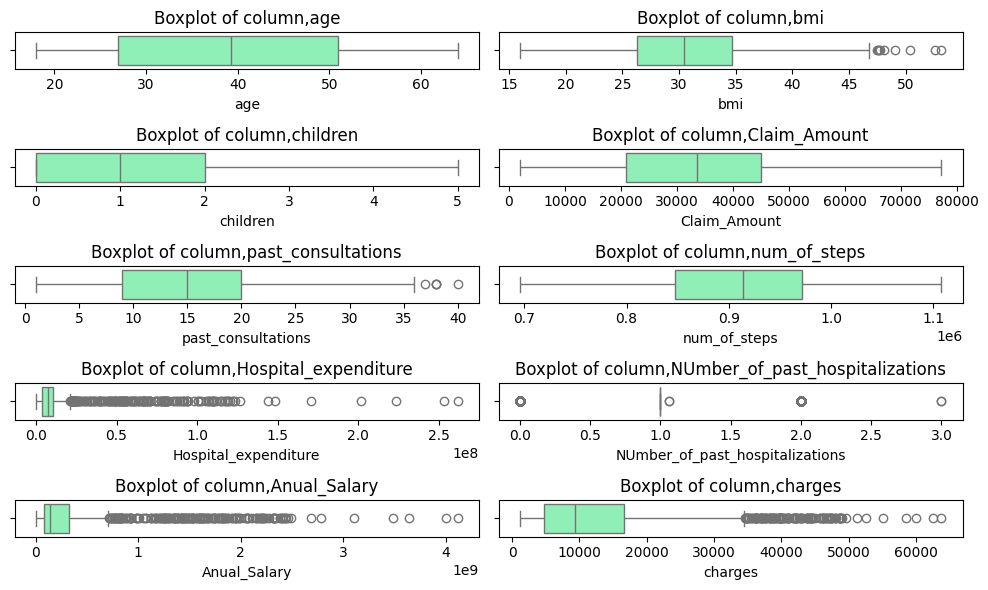

In [586]:
#numeric - boxplot
t=1
for i in num:
            plt.subplot(5,2,t)
            sns.boxplot(x=df[i],palette='rainbow')
            plt.title(f'Boxplot of column,{i}')
            t+=1
plt.tight_layout()
plt.show()

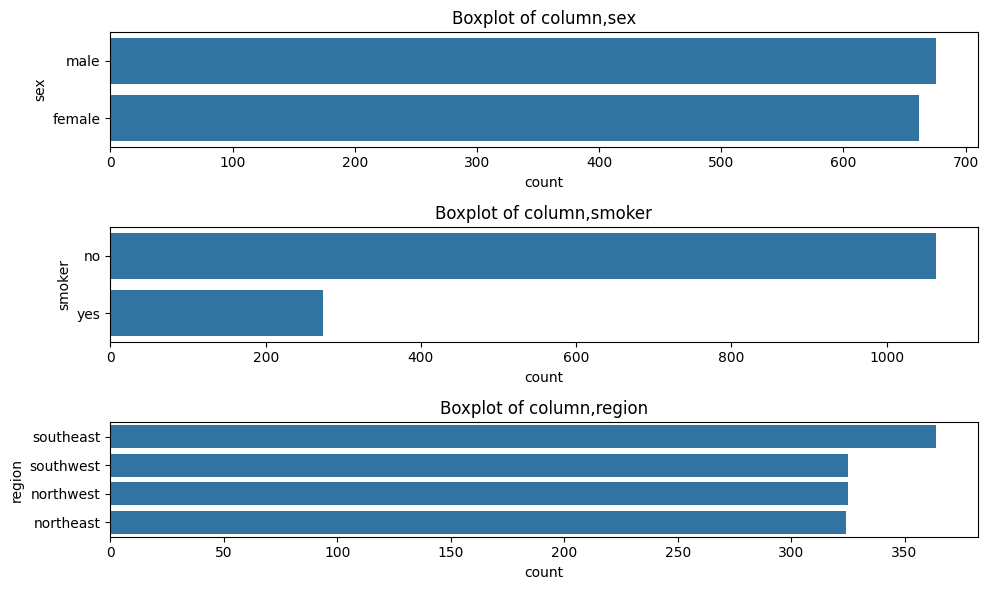

In [587]:
#categorical - countplot
t=1
for i in cat:
            plt.subplot(3,1,t)
            sns.countplot(df[i])
            plt.title(f'Boxplot of column,{i}')
            t+=1
plt.tight_layout()
plt.show()

### Bivariate Analysis

<Axes: xlabel='BMI_Category', ylabel='Hospital_expenditure'>

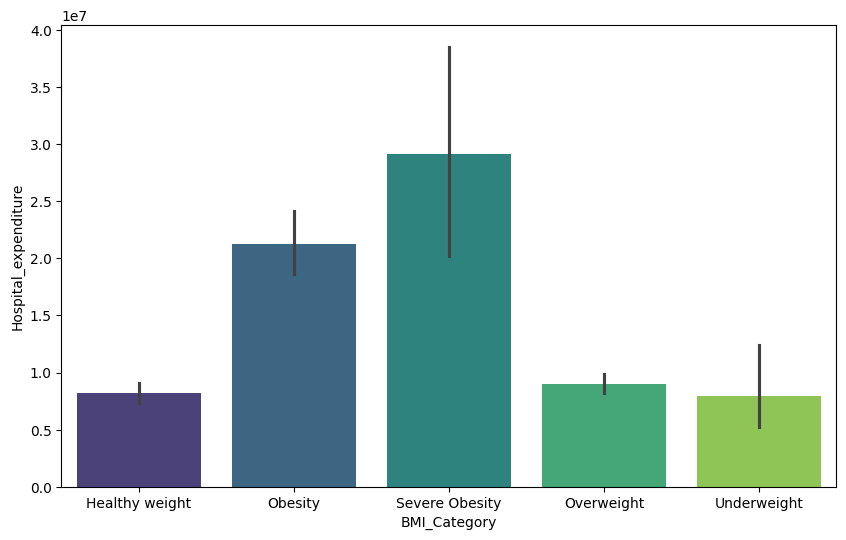

In [588]:
sns.barplot(x=df['BMI_Category'],y=df['Hospital_expenditure'],palette='viridis')

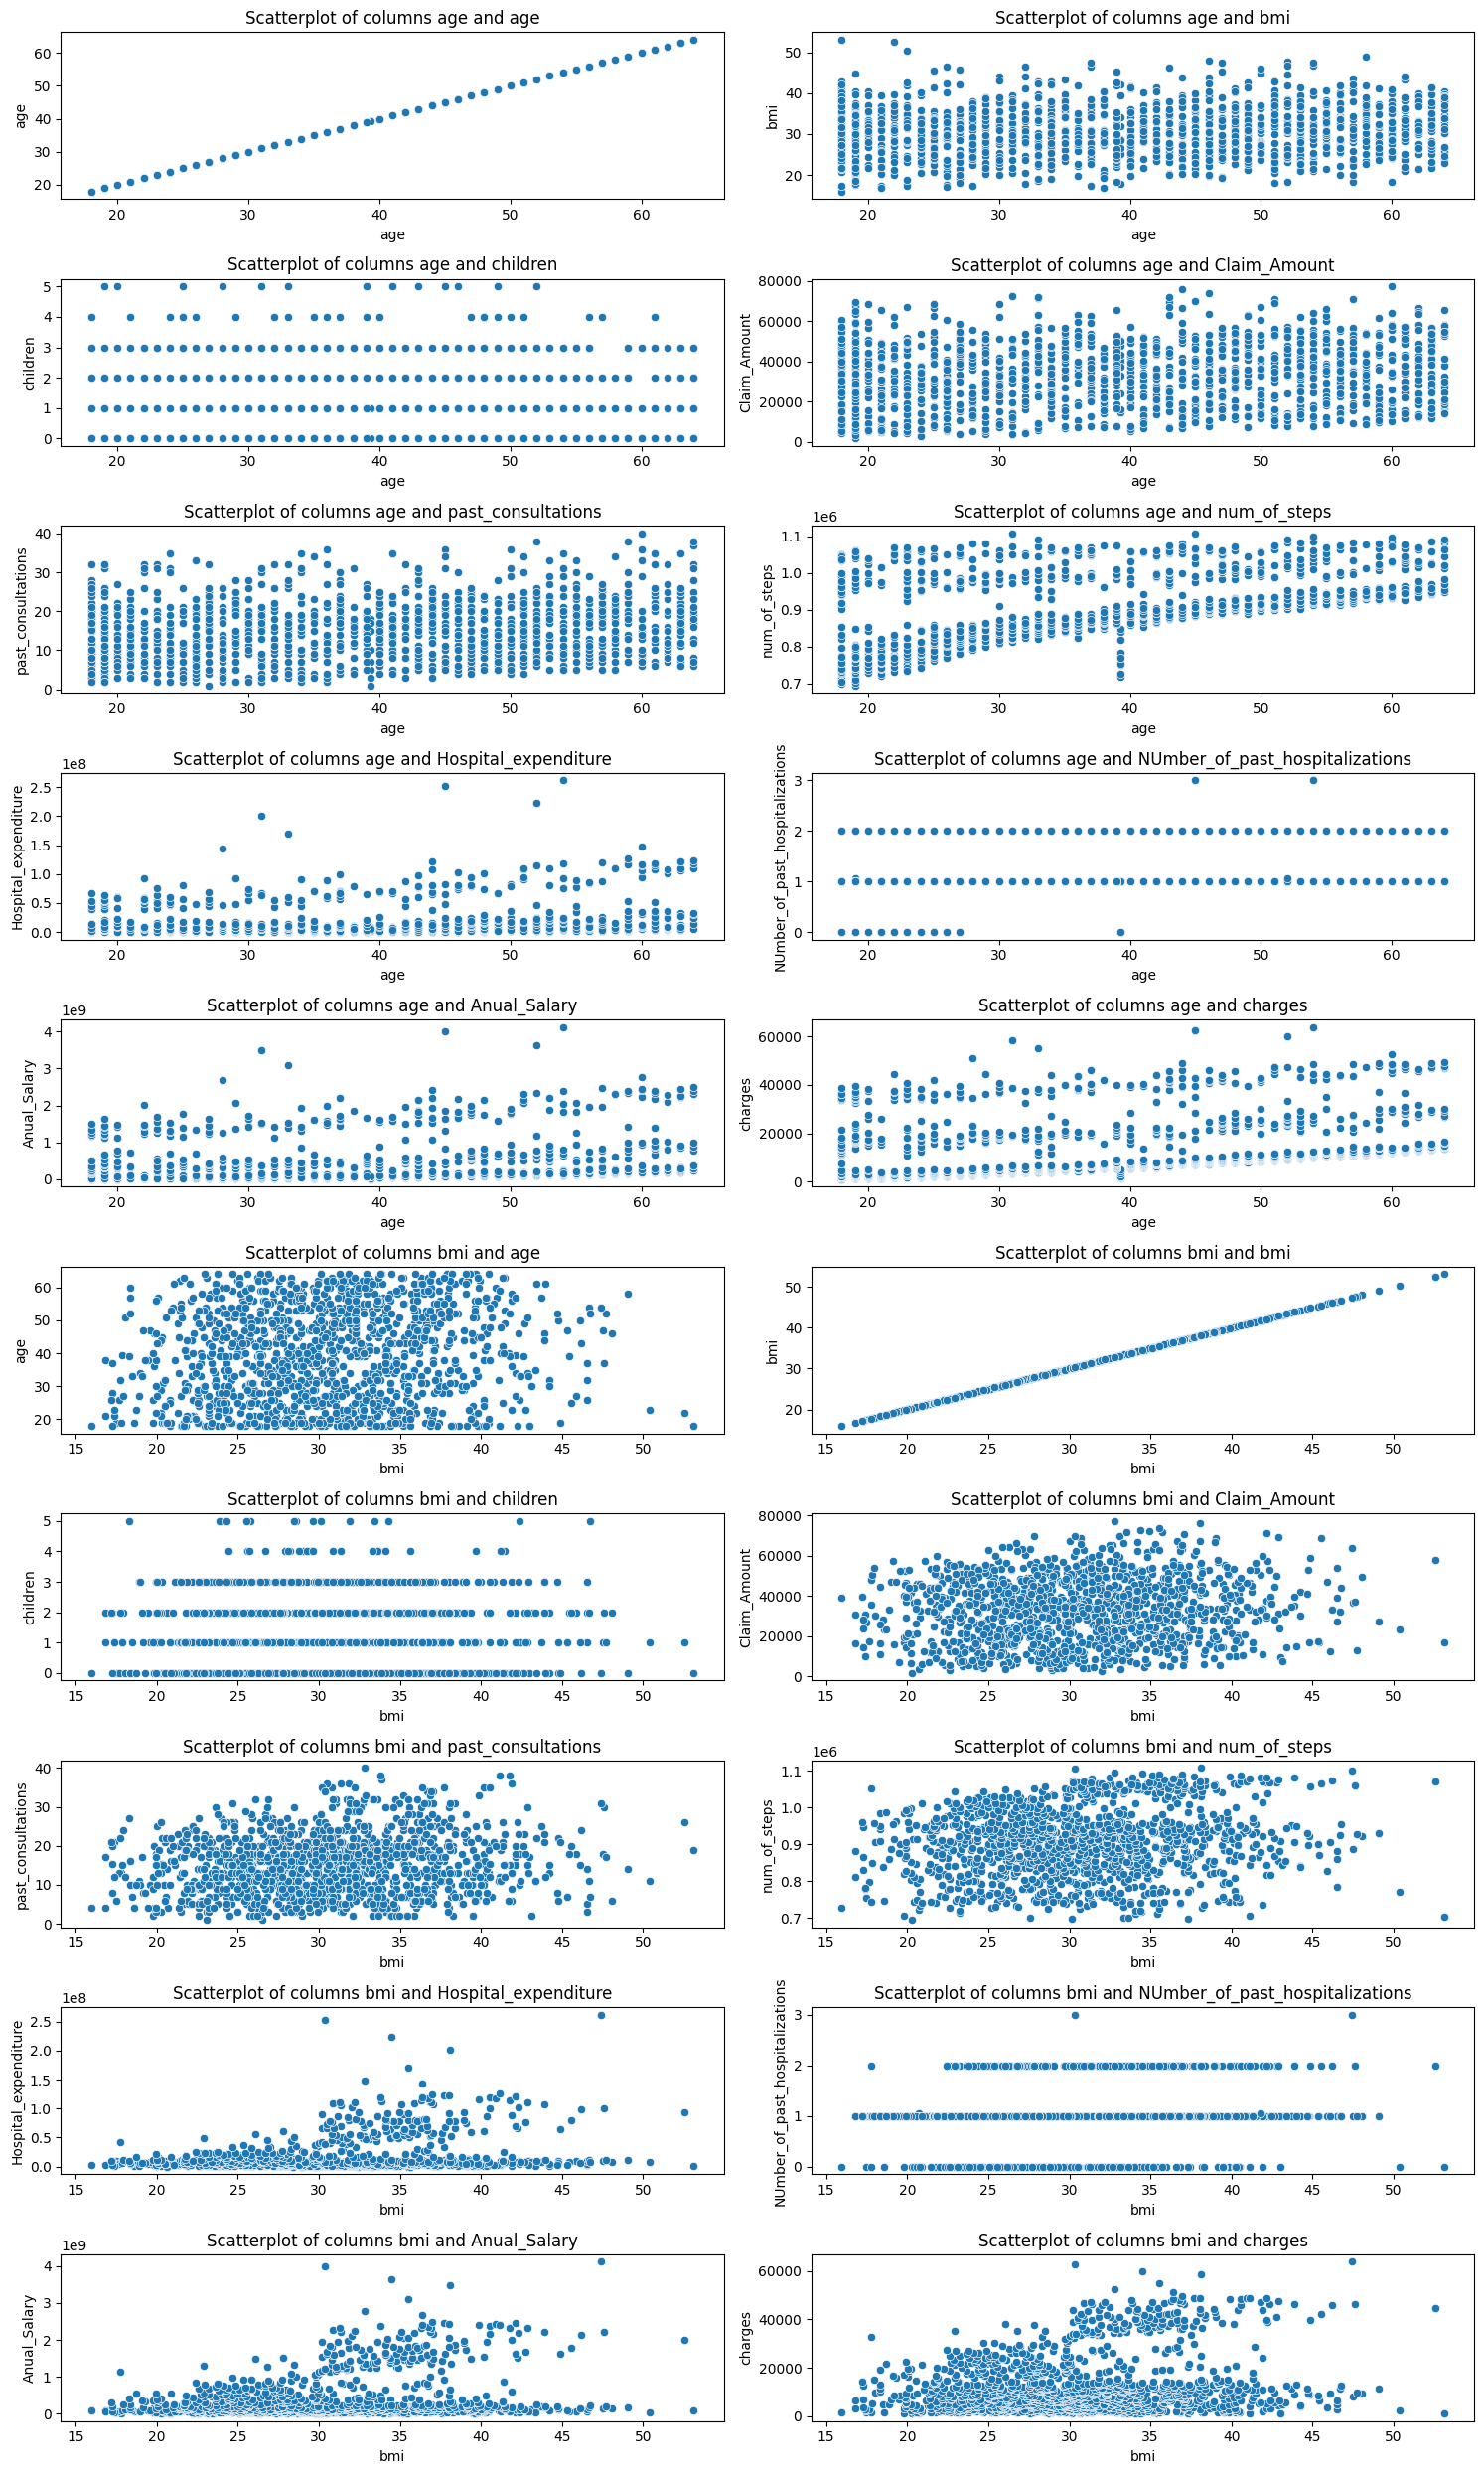

In [589]:
#Numeric vs Numeric
t = 1
fig = plt.figure(figsize=(15, 25))  
for i in num:
    for j in num:
        if t > 20:  
            break
        plt.subplot(10, 2, t)
        sns.scatterplot(x=df[i], y=df[j])
        plt.title(f'Scatterplot of columns {i} and {j}')
        t += 1
plt.tight_layout()
plt.show()

* There is no linear relationship between the numeric columns. Let us analysis it with further methods

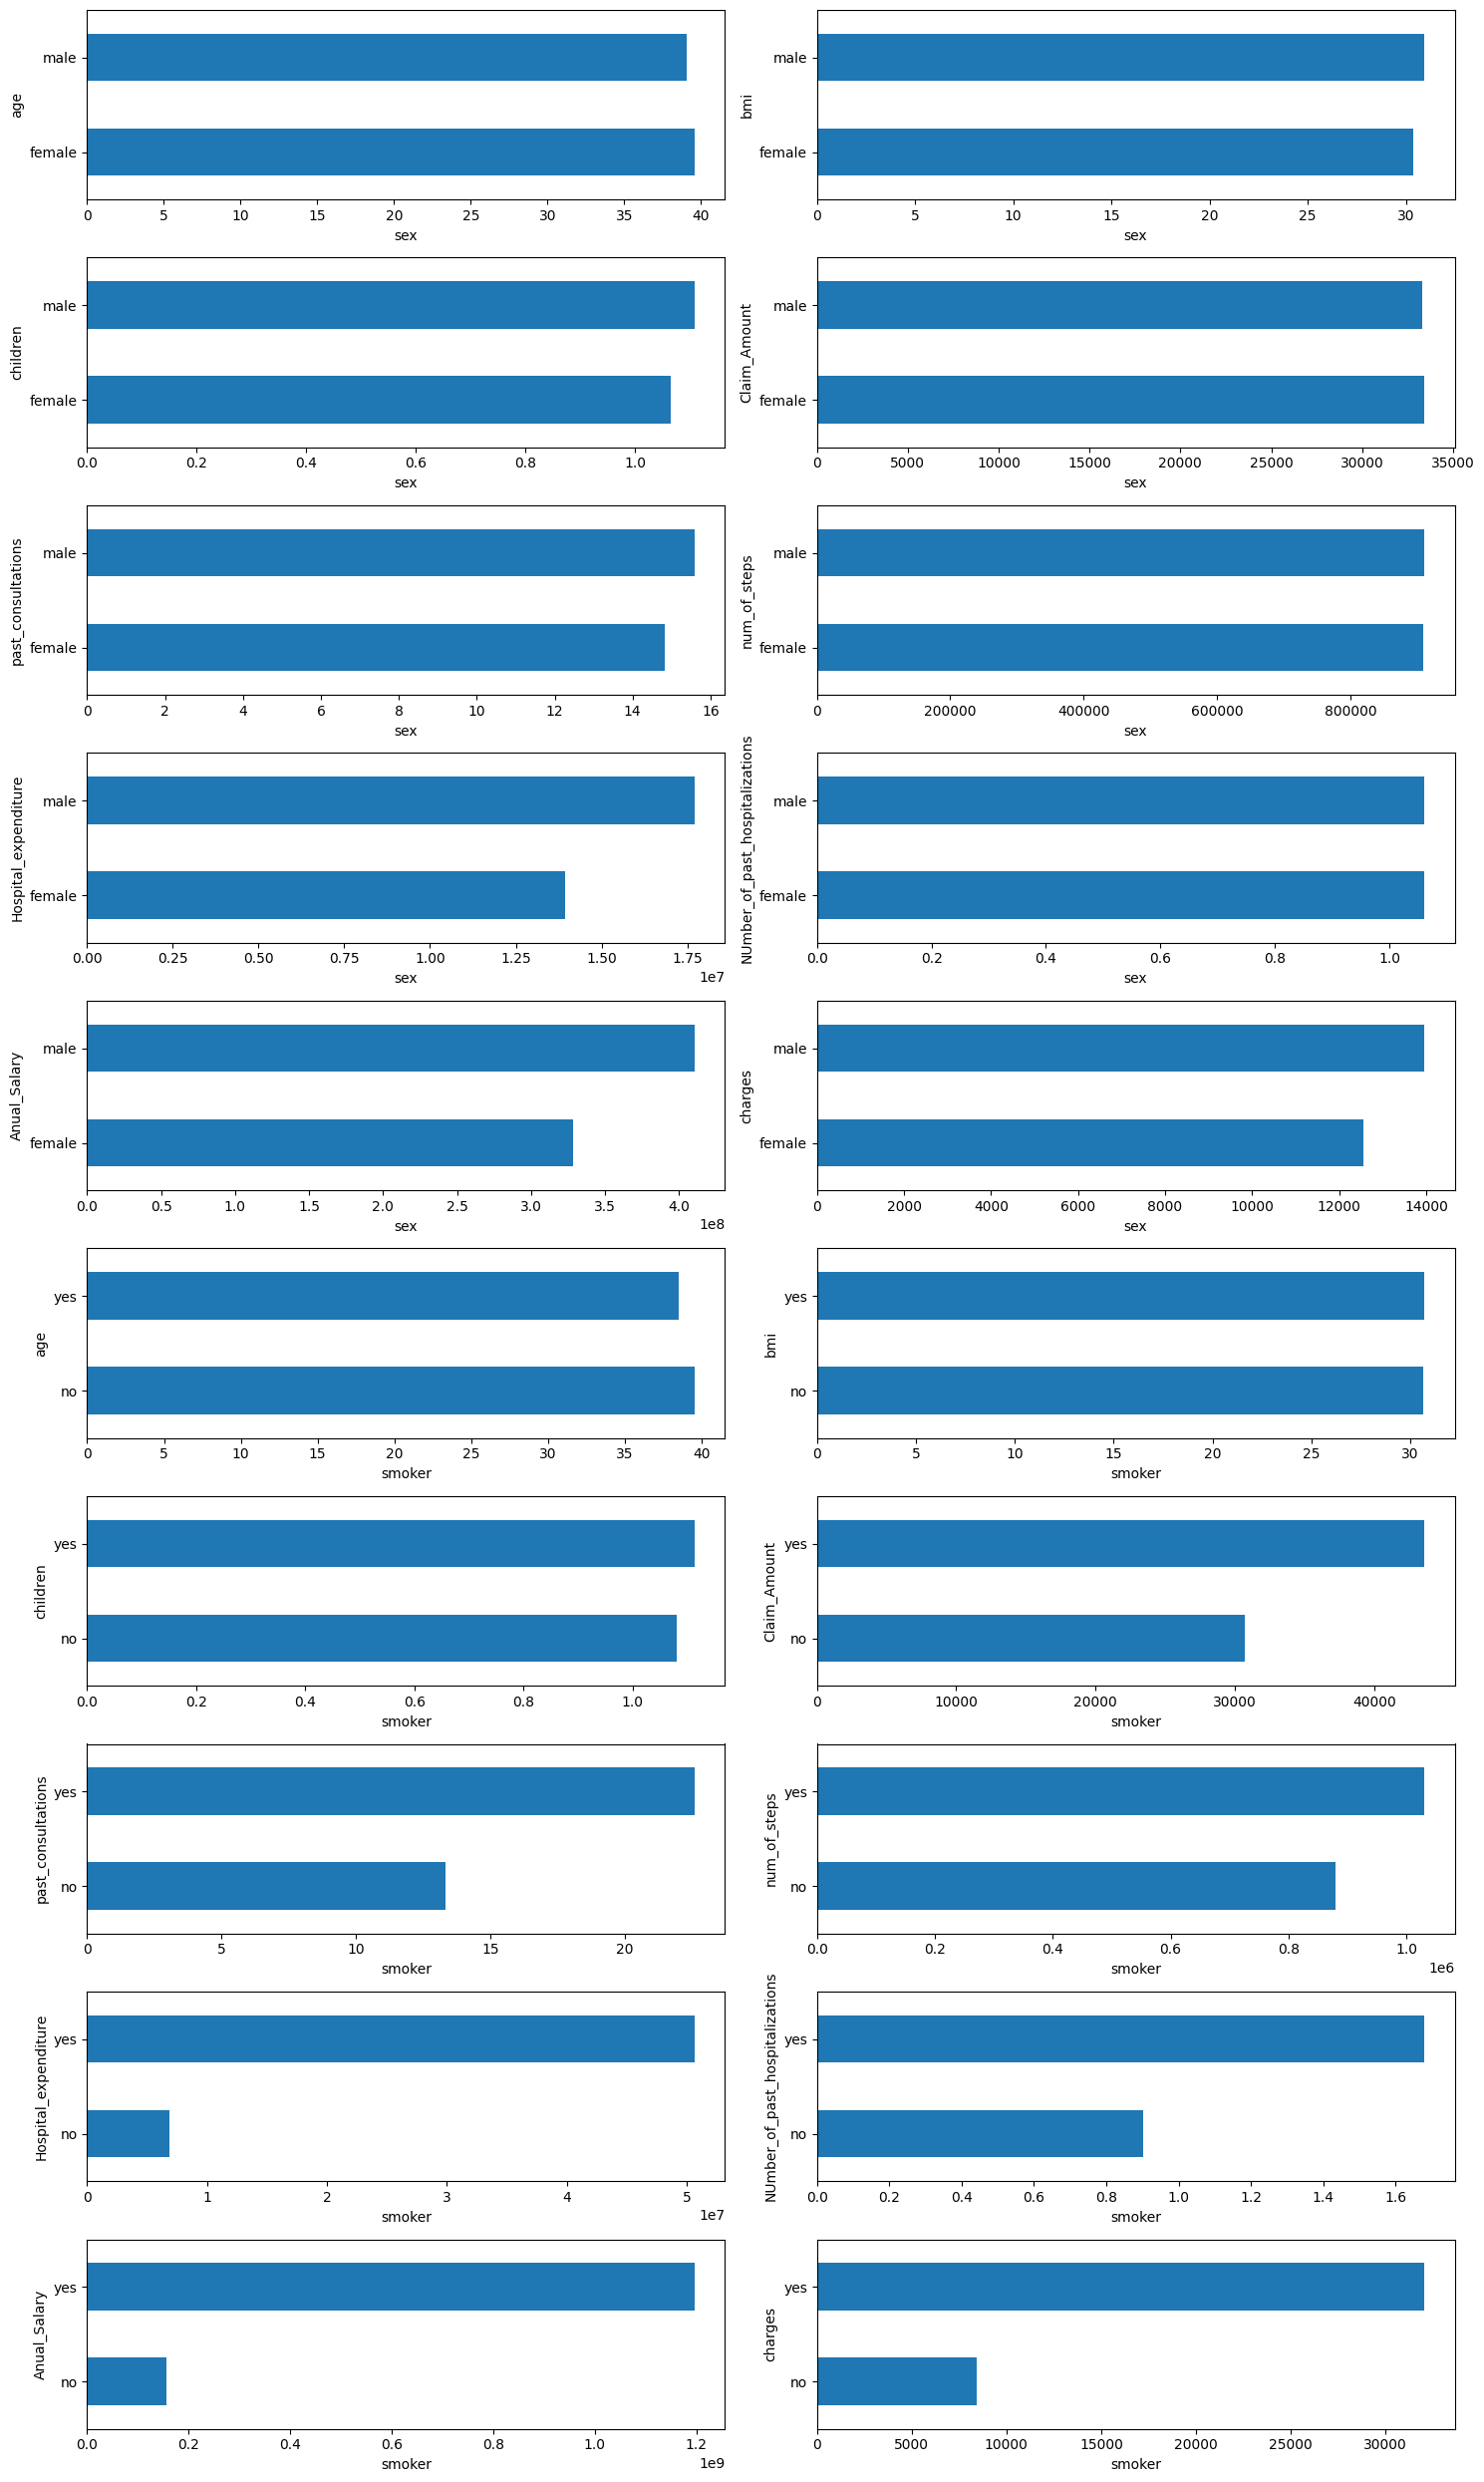

In [590]:
#This gives the all possible visual of the relations between mean of each categorical variables with respect to each numeric variables 

t = 1
fig = plt.figure(figsize=(15, 25))  
for i in cat:
    for j in num:
        if t > 20:  
            break
        plt.subplot(10, 2, t)
        df.groupby(by=df[i])[j].mean().plot(kind='barh')
        plt.xlabel(i)
        plt.ylabel(j)
        t += 1
plt.tight_layout()
plt.show()

### Multivariate analysis

<Axes: xlabel='charges', ylabel='Anual_Salary'>

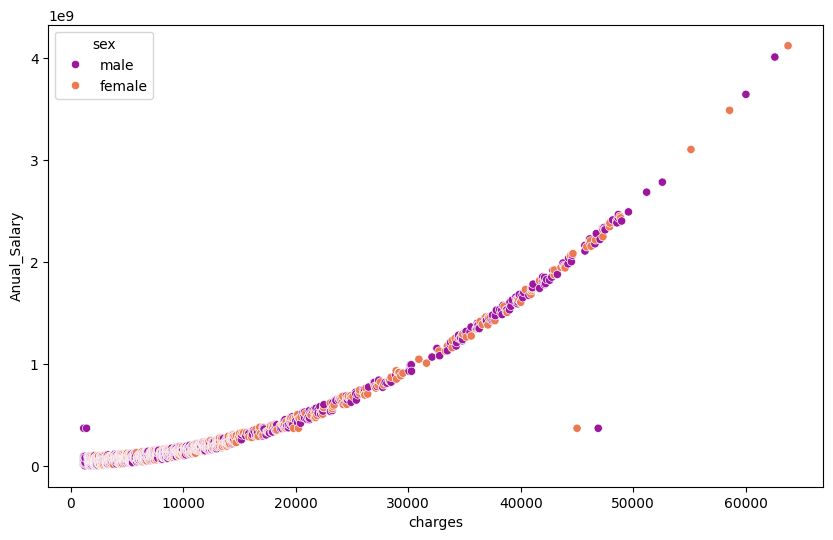

In [591]:
sns.scatterplot(x=df['charges'],y=df['Anual_Salary'],hue=df['sex'],palette='plasma')

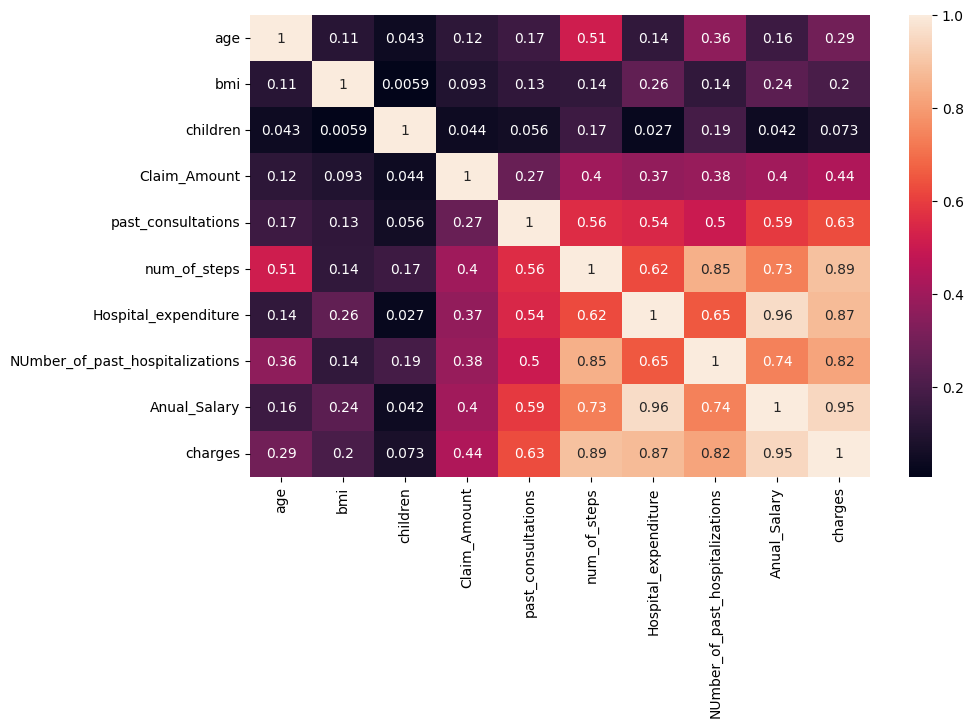

In [592]:
c=df[num].corr()
sns.heatmap(c,annot=True)
plt.show()

* From the above observation we can see that the columns annual_salary and insurance_premium_charges are correlated with each other with 0.95 which is nearly equals to 1 and it is strongly positively correlated
* Also we can see that the columns annual_salary and Hospital_expenditure_charges are correlated with each other with 0.97 which is nearly equals to 1 and it is strongly positively correlated
* Also we can see that the columns num_of_steps and insurance_premium_charges are correlated with each other with 0.89 which is near to 1 and it is strongly positively correlated
* Also we can see that the columns Hospital_expenditure_charges and insurance_premium_charges are correlated with each other with 0.87 which is near to 1 and it is strongly positively correlated

# Statistical Analysis using test

### CHI-SQUARE TEST 

* Ho: There is no significant association between the two variables
* Ha: There is significant association between the two variables

In [593]:
import scipy.stats as stats
import pandas as pd
s=0.05
def chi_square_test(col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print("Chi-Square Statistic:", chi2)
    print("P-Value:", p_value)
    print('Significance Value is', 0.05)
    if p_value > s:
        print('There is no significant association between the two variables')
    else:
        print('There is significant association between the two variables')
    return chi2, p_value

In [594]:
chi_square_test('smoker', 'sex')

Chi-Square Statistic: 7.39291081459996
P-Value: 0.006548143503580697
Significance Value is 0.05
There is significant association between the two variables


(np.float64(7.39291081459996), np.float64(0.006548143503580697))

## Independent T Test

* H0 : There is no significant difference between the two groups
* Ha : There is a significant difference between the two groups 

In [595]:
s=0.05
def t_test_independent(data, col1, col2):
    group1 = data[data[col1] == data[col1].unique()[0]][col2]  
    group2 = data[data[col1] == data[col1].unique()[1]][col2]  
    t_stat, p_value = stats.ttest_ind(group1, group2)
    print("T-Statistic:", t_stat)
    print("P-Value:", p_value)
    print('Significance Value is', s)
    if p_value > s:
        print('There is no significant difference between the two groups')
    else:
        print('There is a significant difference between the two groups')
    return t_stat, p_value

In [596]:
t_test_independent(df, 'sex', 'Hospital_expenditure')

T-Statistic: 2.5971869883971066
P-Value: 0.009502318293976091
Significance Value is 0.05
There is a significant difference between the two groups


(np.float64(2.5971869883971066), np.float64(0.009502318293976091))

In [597]:
t_test_independent(df, 'sex', 'Anual_Salary')

T-Statistic: 2.664692228191343
P-Value: 0.007798671522243165
Significance Value is 0.05
There is a significant difference between the two groups


(np.float64(2.664692228191343), np.float64(0.007798671522243165))

In [598]:
t_test_independent(df, 'smoker', 'Hospital_expenditure')

T-Statistic: -32.36226489278451
P-Value: 3.966957664847704e-170
Significance Value is 0.05
There is a significant difference between the two groups


(np.float64(-32.36226489278451), np.float64(3.966957664847704e-170))

## ANOVA Test

In [599]:
import scipy.stats as stats
s = 0.05  
def anova_test(data, col1, col2):
    groups = [data[data[col1] == group][col2] for group in data[col1].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print("F-Statistic:", f_stat)
    print("P-Value:", p_value)
    print('Significance Value is', s)
    if p_value > s:
        print('All means are same')
    else:
        print('Atleast one group mean is different')
    return f_stat, p_value 

In [600]:
anova_test(df, 'region', 'Anual_Salary')

F-Statistic: 3.8083714524333954
P-Value: 0.009835615733678017
Significance Value is 0.05
Atleast one group mean is different


(np.float64(3.8083714524333954), np.float64(0.009835615733678017))

In [601]:
tukey_result = mc.pairwise_tukeyhsd(df['Anual_Salary'], df['region'], alpha=0.05)
tukey_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-28066049.1439,0.921,-141928051.7184,85795953.4306,False
northeast,southeast,99339634.6675,0.097,-11435344.5385,210114613.8735,False
northeast,southwest,-18646719.586,0.9749,-132508722.1605,95215282.9886,False
northwest,southeast,127405683.8114,0.0165,16720907.0113,238090460.6115,True
northwest,southwest,9419329.5579,0.9966,-104354918.0883,123193577.2042,False
southeast,southwest,-117986354.2534,0.0314,-228671131.0535,-7301577.4534,True


In [602]:
anova_test(df, 'BMI_Category', 'Hospital_expenditure')

F-Statistic: 25.084160666695464
P-Value: 4.691788410289583e-20
Significance Value is 0.05
Atleast one group mean is different


(np.float64(25.084160666695464), np.float64(4.691788410289583e-20))

In [603]:
tukey_result = mc.pairwise_tukeyhsd(df['Hospital_expenditure'], df['BMI_Category'], alpha=0.05)
tukey_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Healthy weight,Obesity,13070338.5931,0.0,7591943.4229,18548733.7633,True
Healthy weight,Overweight,845008.9238,0.995,-5052630.5918,6742648.4394,False
Healthy weight,Severe Obesity,20943103.2131,0.0,12207877.8135,29678328.6127,True
Healthy weight,Underweight,-207037.341,1.0,-16250908.9109,15836834.229,False
Obesity,Overweight,-12225329.6693,0.0,-16791250.3034,-7659409.0352,True
Obesity,Severe Obesity,7872764.62,0.0512,-24680.6734,15770209.9134,False
Obesity,Underweight,-13277375.9341,0.1378,-28880942.6524,2326190.7843,False
Overweight,Severe Obesity,20098094.2893,0.0,11904256.3376,28291932.2409,True
Overweight,Underweight,-1052046.2648,0.9998,-16807700.2515,14703607.722,False
Severe Obesity,Underweight,-21150140.5541,0.0064,-38172556.4659,-4127724.6422,True


In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   NUmber_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

## Transformation

In [605]:
num

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'charges']

In [606]:
tran_list = ['bmi','past_consultations','Hospital_expenditure','NUmber_of_past_hospitalizations','Anual_Salary']

In [607]:
pp = PowerTransformer()
for i in tran_list:
    df[i] = pp.fit_transform(df[[i]])

# Encoding

## N-1 Dummy Encoding

In [608]:
df = pd.get_dummies(data = df, 
                     columns= ['sex','smoker'],
                   dtype = int, drop_first=True)

In [609]:
dff

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges,BMI_Category,bmi_T,past_consultations_T,Hospital_expenditure_T,NUmber_of_past_hospitalizations_T,Anual_Salary_T,sex_male,smoker_yes
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390,Healthy weight,-1.258340,0.329539,-0.397711,-2.016471,-0.906548,1,0
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660,Obesity,-0.032729,-1.129008,-0.471008,-2.016471,-2.258111,1,0
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070,Obesity,0.480203,0.574672,-0.077720,-2.016471,-0.658739,1,0
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940,Obesity,0.531725,-0.485339,-0.481854,-2.016471,-0.631481,1,0
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100,Obesity,0.600000,0.202707,-0.584454,-2.016471,-1.740565,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,35.530,0.0,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209,Obesity,0.818668,1.969098,2.654785,1.746062,2.197132,0,1
1334,31.0,38.095,1.0,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448,Obesity,1.199286,1.871207,2.798267,1.746062,2.272626,0,1
1335,52.0,34.485,3.0,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897,Obesity,0.659352,1.254549,2.887374,1.746062,2.300930,1,1
1336,45.0,30.360,0.0,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309,Obesity,0.003558,2.161231,2.992508,3.560207,2.362175,1,1


## Label Encoding

In [610]:
le = LabelEncoder()
df['BMI_Category']= le.fit_transform(df['BMI_Category'])
df['region']= le.fit_transform(df['region'])

# Train Test Split

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   bmi                              1338 non-null   float64
 2   children                         1338 non-null   float64
 3   Claim_Amount                     1338 non-null   float64
 4   past_consultations               1338 non-null   float64
 5   num_of_steps                     1338 non-null   float64
 6   Hospital_expenditure             1338 non-null   float64
 7   NUmber_of_past_hospitalizations  1338 non-null   float64
 8   Anual_Salary                     1338 non-null   float64
 9   region                           1338 non-null   int64  
 10  charges                          1338 non-null   float64
 11  BMI_Category                     1338 non-null   int64  
 12  sex_male            

In [612]:
x = df.drop('charges',axis=1)
y = df['charges']

In [613]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

## Scaling:

In [614]:
ss=StandardScaler()
xtrain_sc=ss.fit_transform(xtrain)
xtest_sc=ss.transform(xtest)

## Base Model:

## Linear Regreesion:

In [615]:
lr=LinearRegression()
lr.fit(xtrain_sc,ytrain)
ypred_lr_test=lr.predict(xtest_sc)
ypred_lr_train=lr.predict(xtrain_sc)

In [616]:
print('RMSE of Test:', np.sqrt(mean_squared_error(ytest, ypred_lr_test)))
print('RMSE of Train:', np.sqrt(mean_squared_error(ytrain, ypred_lr_train)))

RMSE of Test: 3408.031689168603
RMSE of Train: 3372.107904843541


In [617]:
print('Rsquared value of Test',r2_score(ytest,ypred_lr_test))
print('Rsquared value of Train',r2_score(ytrain,ypred_lr_train))

Rsquared value of Test 0.9240312249558343
Rsquared value of Train 0.9209023525903174


## Decision Tree:

In [618]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=6,min_samples_split=5)
dt.fit(xtrain_sc,ytrain)
ypred_dt_test=dt.predict(xtest_sc)
ypred_dt_train=dt.predict(xtrain_sc)

In [619]:
print('RMSE of Test:', np.sqrt(mean_squared_error(ytest, ypred_dt_test)))
print('RMSE of Train:', np.sqrt(mean_squared_error(ytrain, ypred_dt_train)))

RMSE of Test: 1456.868481110368
RMSE of Train: 567.4094291479778


In [620]:
print('Rsquared value of Test',r2_score(ytest,ypred_dt_test))
print('Rsquared value of Train',r2_score(ytrain,ypred_dt_train))

Rsquared value of Test 0.9861174716140864
Rsquared value of Train 0.9977604862297704


## Boosting:

## Gradient Boost:

In [621]:
gb=GradientBoostingRegressor()
gb.fit(xtrain_sc,ytrain)
ypred_gb_test=gb.predict(xtest_sc)
ypred_gb_train=gb.predict(xtrain_sc)

In [622]:
print('RMSE of Test:', np.sqrt(mean_squared_error(ytest, ypred_gb_test)))
print('RMSE of Train:', np.sqrt(mean_squared_error(ytrain, ypred_gb_train)))

RMSE of Test: 756.0972349238245
RMSE of Train: 403.74878701943976


In [623]:
print('Rsquared value of Test',r2_score(ytest,ypred_gb_test))
print('Rsquared value of Train',r2_score(ytrain,ypred_gb_train))

Rsquared value of Test 0.9962607614310665
Rsquared value of Train 0.9988660782094848


## XGBoost:

In [624]:
xb=XGBRegressor()
xb.fit(xtrain_sc,ytrain)
ypred_xb_test=xb.predict(xtest_sc)
ypred_xb_train=xb.predict(xtrain_sc)

In [625]:
print('Rsquared value of Test',r2_score(ytest,ypred_xb_test))
print('Rsquared value of Train',r2_score(ytrain,ypred_xb_train))

Rsquared value of Test 0.9915934518234585
Rsquared value of Train 0.9999959253788959


In [626]:
print('RMSE of Test:', np.sqrt(mean_squared_error(ytest, ypred_xb_test)))
print('RMSE of Train:', np.sqrt(mean_squared_error(ytrain, ypred_xb_train)))

RMSE of Test: 1133.6915655883731
RMSE of Train: 24.20267088167749


## Ada Boost:

In [627]:
ab=AdaBoostRegressor()
ab.fit(xtrain_sc,ytrain)
ypred_ab_test=ab.predict(xtest_sc)
ypred_ab_train=ab.predict(xtrain_sc)

In [628]:
print('RMSE of Test:', np.sqrt(mean_squared_error(ytest, ypred_ab_test)))
print('RMSE of Train:', np.sqrt(mean_squared_error(ytrain, ypred_ab_train)))

RMSE of Test: 939.7837982018306
RMSE of Train: 964.9705939898391


In [629]:
print('Rsquared value of Test',r2_score(ytest,ypred_ab_test))
print('Rsquared value of Train',r2_score(ytrain,ypred_ab_train))

Rsquared value of Test 0.9942232472189261
Rsquared value of Train 0.9935227777632892


## Function for Append the Metrics:

In [630]:
import pandas as pd
from sklearn import metrics


score_card = pd.DataFrame(columns=['Model Name', 'Train R2 Score', 'Test R2 Score',
                                   'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE'])

def update_score_card_regression(model_name, model, xtrain, xtest, ytrain, ytest):
   
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)
    
    global score_card

    
    train_r2 = metrics.r2_score(ytrain, y_pred_train)
    test_r2 = metrics.r2_score(ytest, y_pred_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(ytrain, y_pred_train))
    test_rmse = np.sqrt(metrics.mean_squared_error(ytest, y_pred_test))
    train_mae = metrics.mean_absolute_error(ytrain, y_pred_train)
    test_mae = metrics.mean_absolute_error(ytest, y_pred_test)

    
    new_row = pd.DataFrame({'Model Name': [model_name],
                            'Train R2 Score': [train_r2],
                            'Test R2 Score': [test_r2],
                            'Train RMSE': [train_rmse],
                            'Test RMSE': [test_rmse],
                            'Train MAE': [train_mae],
                            'Test MAE': [test_mae]})
    
    
    score_card = pd.concat([score_card, new_row], ignore_index=True)
    
    return score_card




In [631]:
update_score_card_regression('Linear_Regression',lr,xtrain_sc,xtest_sc,ytrain,ytest)

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Linear_Regression,0.920902,0.924031,3372.107905,3408.031689,2527.57874,2637.807936


In [632]:
update_score_card_regression('Decision_Tree',dt,xtrain_sc,xtest_sc,ytrain,ytest)

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Linear_Regression,0.920902,0.924031,3372.107905,3408.031689,2527.578740,2637.807936
1,Decision_Tree,0.997760,0.986117,567.409429,1456.868481,393.602473,583.198350


In [633]:
update_score_card_regression('Ada_Boost',ab,xtrain_sc,xtest_sc,ytrain,ytest)

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Linear_Regression,0.920902,0.924031,3372.107905,3408.031689,2527.578740,2637.807936
1,Decision_Tree,0.997760,0.986117,567.409429,1456.868481,393.602473,583.198350
2,Ada_Boost,0.993523,0.994223,964.970594,939.783798,790.895632,760.076094


In [634]:
update_score_card_regression('Gradient_Boost',gb,xtrain_sc,xtest_sc,ytrain,ytest)

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Linear_Regression,0.920902,0.924031,3372.107905,3408.031689,2527.578740,2637.807936
1,Decision_Tree,0.997760,0.986117,567.409429,1456.868481,393.602473,583.198350
2,Ada_Boost,0.993523,0.994223,964.970594,939.783798,790.895632,760.076094
3,Gradient_Boost,0.998866,0.996261,403.748787,756.097235,300.778305,482.450866


In [635]:
update_score_card_regression('XG_Boost',xb,xtrain_sc,xtest_sc,ytrain,ytest)

,Model Name,Train R2 Score,Test R2 Score,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Linear_Regression,0.920902,0.924031,3372.107905,3408.031689,2527.578740,2637.807936
1,Decision_Tree,0.997760,0.986117,567.409429,1456.868481,393.602473,583.198350
2,Ada_Boost,0.993523,0.994223,964.970594,939.783798,790.895632,760.076094
3,Gradient_Boost,0.998866,0.996261,403.748787,756.097235,300.778305,482.450866
4,XG_Boost,0.999996,0.991593,24.202671,1133.691566,17.444723,462.247640
